In [1]:
import os
import time 
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np 
import pandas as pd
import seaborn as sns
from scipy import stats

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
naive_data_200200 = {
    "algorithm": "2.1",
    "S": 5,
    "l": 0.2,
    "NZ": 200,
    "NE": 200,
    "muHat": [ 0.000525, 0.004225, 0.008875, 0.012275, 0.01215],
    "muCI0": [ 0.00030050726786140611202641226284982, 0.0035893315862373844499222386161819, 0.0079558528132435257090859792583615, 0.011195890689833263437202859336139, 0.011076331264208835389317719943847],
    "muCI1": [ 0.00074949273213859371467471248706715, 0.0048606684137626147285127231612023, 0.0097941471867564727088462106507905, 0.013354109310166735469227461408082, 0.013223668735791161560344519898536],
    "sigmaHat":  [0.02290714939570212549391214906791, 0.064863352953446848370155919383251, 0.093789414575217694425290915205551, 0.11011188623701924360620552079126, 0.10955673218444739180910119102919],
    "sigmaCI0": [ 0.022749512395221580668414063097771, 0.064416991678891644124149706840399, 0.093143996774204124156071316065209, 0.10935414431270476520730028369144, 0.10880281058793277171314883844389],
    "sigmaCI1": [ 0.023067001590489601831057697722827, 0.065315986720825544575852461548493, 0.094443902111344471550502532863902, 0.11088027633144448280688720842591,  0.1103212482659076815183496478312]
}

naive_data_300300 = {
    "algorithm": "2.1",
    "S": 5,
    "l": 0.2,
    "NZ": 300,
    "NE": 300,
    "muHat": [0.016011111111111111111111111111111, 0.0131, 0.016955555555555555555555555555556, 0.0058555555555555555555555555555556, 0.0053],
    "muCI0": [0.01519105999755277977558698410121, 0.012357139421670564408128889510863, 0.016112069944402521159965147035109, 0.0053570799752713314095808883052996, 0.0048256279597619433988087145337431],
    "muCI1": [ 0.016831162224669442978308708802615,  0.01384286057832943492296173815248, 0.017799041166708592931477994625311,   0.00635403113583977996459140058505,  0.005774372040238056648375764012826 ],
    "sigmaHat": [ 0.12551864597288087121995658890228, 0.11370370992357581307885538990377, 0.1291055765416090073127719506374, 0.07629765858902319564105454219316, 0.072608323058924104098643681481917 ],
    "sigmaCI0": [ 0.12494147259650589809609755320707,  0.1131808652605037629479411975808, 0.12851190935420597760696637124056, 0.075946818465820742360961048689205, 0.072274447636288499663415052509663 ],
    "sigmaCI1": [ 0.12610121384953845713461362265662, 0.11423144130838203125222207745537, 0.12970479238725118875663611106575, 0.076651777808631069155431703165959, 0.072945319018880891426270807187393 ]
}


naive_data_400002 = {
    "algorithm": "2.1",
    "S": 5,
    "l": 0.2,
    "NZ": 40000,
    "NE": 2,
    # muHat is the MC estimate
    "muHat":[ 0.008775, 0.0089, 0.0094, 0.008875, 0.0090375],
    # confidence intervals for MC estimates
    "muCI0": [ 0.0081287179873950100861268452945296, 0.0082491721571254453954091800937931, 0.0087313090103072824033070276072976, 0.0082250786871764704905052312255975, 0.0083817094593572043920159941876591],
    "muCI1": [ 0.0094212820126049895419484414560429, 0.0095508278428745544547107115818108,  0.010068690989692718334991283768431, 0.0095249213128235261927034827067473, 0.0096932905406427963962423532962021],
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": [ 0.09326364833819769661893417378451, 0.09391964789782791811489914834965, 0.096497442437316574559424964263599, 0.093788828382139866057798371912213, 0.094635804761919697924987815440545],
    # confidence intervals for MC estimates
    "sigmaCI0": [ 0.092808906457860079752819615350745, 0.093461707445714886643983732028573, 0.096026932981557441837416888574808, 0.093331525789617453270352598337922, 0.094174372418541443807704638402356],
    "sigmaCI1": [  0.09372289952161305670585988991661, 0.094382129370637349308204022690916, 0.096972617550295098221013745387609, 0.094250665670227135040093457973853, 0.095101812752222347757680154245463]
}



naive_data_400400 = {
    "algorithm": "2.1",
    "S": 5,
    "l": 0.2,
    "NZ": 400,
    "NE": 400,
    # muHat is the MC estimate
    "muHat": [ 0.0176375, 0.0098187499999999993532950881558463, 0.00825, 0.011831249999999999752975377020903, 0.00545],
    # confidence intervals for MC estimates
    "muCI0": [  0.01699251867003452945437125265471, 0.0093356042177687344196801433326982, 0.0078067784980671468819668490368713,  0.01130143577356311837545099763247,  0.005089251690818184271913882099625],
    "muCI1": [ 0.018282481329965471344989325075403,  0.010301895782231264286910032978994, 0.0086932215019328538951892682007383, 0.012361064226436881130499756409336, 0.0058107483091818156947794271616203],
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": [ 0.131630265837864968148096522782, 0.098602245985863354316158790879854, 0.090454345597263369205265348682588, 0.10812652123481300558971440750611, 0.073622899814332259937899038959586],
    # confidence intervals for MC estimates
    "sigmaCI0": [ 0.13117578316045166997305670975038, 0.098261799869847607502570951965026,  0.09014203191386360725090298728901, 0.10775319044681083702208468366734, 0.073368700429308125743332880119851],
    "sigmaCI1": [ 0.13208793063056409322619799695531,   0.0989450757764251537240696166009, 0.090768845982588872156604509200406, 0.10850246594335870298220214635876,  0.07387887900701230192712642974584]
}




bernoulli_data_200200 = {
    "algorithm": "2.2",
    "S": 5,
    "l": 0.2,
    "NZ": 200,
    "NE": 200,
    # muHat is the MC estimate
    "muHat":[ 0.020125, 0.0119, 0.018475, 0.0097, 0.0087],
    # confidence intervals for MC estimates
    "muCI0": [ 0.018748773395203817415666236456673, 0.010837300206135481311919832592139, 0.017155286764075385053107680732865, 0.0087394810827128559943544061638931, 0.0077898796076046224190481126470331],
    "muCI1": [ 0.021501226604796183639045636937226, 0.012962699793864520397823625330602, 0.019794713235924611682836626869175,  0.010660518917287144582961566641188, 0.0096101203923953763819110207577978],
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": [ 0.14042961720000535219554649302154, 0.10843746569847802219133114931537, 0.13466301544295486425362184945698, 0.098010969558297064696539280248544, 0.092868324056945256161910151604388],
    # confidence intervals for MC estimates
    "sigmaCI0": [ 0.13946324188845335423359017568146, 0.10769124640522859115421283604519, 0.13373632336689605937252167677798, 0.097336500859094426951756418020523, 0.092229244798714263287031656091131],
    "sigmaCI1": [ 0.14140957250281566137672939476033, 0.10919417124003902297424417611182,  0.1356027298615151699401337737072, 0.098694916230425630554456972731714, 0.093516383977902628465983525529737]
}
 
    
bernoulli_data_300300 = {
    "algorithm": "2.2",
    "S": 5,
    "l": 0.2,
    "NZ": 300,
    "NE": 300,
    # muHat is the MC estimate
    "muHat":[ 0.011855555555555555555555555555556, 0.0089555555555555555555555555555556, 0.0075555555555555555555555555555556, 0.0061, 0.0036222222222222222222222222222222],
    # confidence intervals for MC estimates
    "muCI0": [ 0.011148414159786387833683818371355, 0.0083400557478076516038090204574473, 0.0069898096834204422392322619828064, 0.0055912887376475105954964917032157, 0.0032297267496464456514038143808421],
    "muCI1": [ 0.012562696951324722055565175082847, 0.0095710553633034586851202618618117,  0.008121301427690668511827354336674,  0.006608711262352490178884067972831, 0.0040147176947979987607362239998565],
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": [ 0.10823646116786272974863436502346, 0.094209618385683646657469125784701, 0.086594182558956803164029736308294, 0.077864352338444173251552626879857, 0.060076133613704438274361052663153],
    # confidence intervals for MC estimates
    "sigmaCI0": [ 0.10773875659771758872551572494558, 0.093776413556957163852878522902756,  0.08619599584865098029773378129903, 0.077506308075059274220741656336031,  0.05979988505629992706635889021527],
    "sigmaCI1": [ 0.10873881749007097141657141037285, 0.094646872125303566081200301596255, 0.086996090886387072993457536540518, 0.078225743031098138313694789758301, 0.060354964103994268587172200568602]
}


bernoulli_data_400002 = {
    "algorithm": "2.2",
    "S": 5,
    "l": 0.2,
    "NZ": 40000,
    "NE": 2,
    # muHat is the MC estimate
    "muHat": [ 0.0088625, 0.0090625, 0.00875, 0.0090875, 0.00815],
    # confidence intervals for MC estimates
    "muCI0": [ 0.0082130324440326477747342792667951, 0.0084058113285356284016813788184663,  0.008104631135325071622510506585968, 0.0084299144700210170561005540434962, 0.0075269625018612399541817481463113],
    "muCI1": [ 0.0095119675559673533965510117127451, 0.0097191886714643703493177184782326, 0.0093953688646749300428240303517669, 0.0097450855299789831270862450196546, 0.0087730374981387585636705139791047],
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": [ 0.093723347649209004517345533713524, 0.094765412201816542903110018869484, 0.093131873809789350593391077381966, 0.09489483603767218111713077632885, 0.089909279532182848071464320582891],
    # confidence intervals for MC estimates
    "sigmaCI0": [  0.09326636433254753555388560926076, 0.094303347908777576669159259381559, 0.092677774445564881089509867706511, 0.094432140690202837074451736043557,  0.08947089313445150127179772425734],
    "sigmaCI1": [ 0.094184862495437893237237858556909, 0.095232058408307521113478344432224, 0.093590476105785080918053608911578,   0.0953621195562438794812720743721, 0.090352013049055851512392223412462] 
}



bernoulli_data_400400 = {
    "algorithm": "2.2",
    "S": 5,
    "l": 0.2,
    "NZ": 400,
    "NE": 400,
    # muHat is the MC estimate
    "muHat": [ 0.0176375, 0.009325, 0.017756250000000001199040866595169, 0.0102625, 0.004631249999999999950039963891868],
    # confidence intervals for MC estimates
    "muCI0": [ 0.016992518670034525984924300701095, 0.0088540413647877711650346910232656, 0.017109140158464590519837855708829, 0.0097686678731749559262409476900757, 0.0042985645129416044998849066871571],
    "muCI1": [ 0.018282481329965474814436277029017, 0.0097959586352122287461474670067219, 0.018403359841535411878243877481509,  0.010756332126825045650275747277647, 0.0049639354870583954001950210965788],
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": [ 0.13163026583786593959324306979397, 0.096115046236985635097482827404747, 0.13206466065020008859853817284602, 0.10078315621436474691652307456025, 0.067895731345030574388488275872078],
    # confidence intervals for MC estimates
    "sigmaCI0":[ 0.13117578316045264141820325676235, 0.095783187729556240608275174963637, 0.13160867812838467072467096841137, 0.10043518002224122165344510904106, 0.067661306278954710946571537988348],
    "sigmaCI1": [ 0.13208793063056506467134454396728, 0.096449228291783734023923102540721, 0.13252383578864282420717302102275,  0.1011335688037704738651001434846, 0.068131797766483023770511806560535]
}



bernoulli_data_500500 = {
    "algorithm": "2.2",
    "S": 5,
    "l": 0.2,
    "NZ": 500,
    "NE": 500,
    # muHat is the MC estimate
    "muHat": [ 0.0061960000000000001185718190299667, 0.005552, 0.012028000000000000496713781217295, 0.002784, 0.014848],
    "muCI0": [ 0.0058883994322942974711243557806029, 0.0052607292822756911154780112838125, 0.011600683083525463110130537813802, 0.0025774570896019465340853749069083, 0.014373903598405374237856335639663],
    "muCI1": [ 0.0065036005677057027660192822793306,  0.005843270717724308171980851511762, 0.012455316916474537883297024620788, 0.0029905429103980534985551820170713, 0.015322096401594625936226634621562],
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": [ 0.078470594585076283711266853515554, 0.074304760148934737018500129579479, 0.10901089280205729370454292848081, 0.052690231058916528472657603288098, 0.12094459643315454144829601546007],
    # confidence intervals for MC estimates
    "sigmaCI0":[ 0.078253694239093410378593773657485, 0.074099374573998066928481875947909, 0.10870957610515073754609005618477, 0.05254459014199693023261517055289, 0.12061029382018441380441942101243],
    "sigmaCI1": [ 0.078688709003476658976339308537717, 0.074511295343805641899770364489086, 0.10931389608129264690017379280107, 0.05283668718255832286168072187138, 0.12128077026297158502732287388426]
}



bernoulli_data_600600 = {
    "algorithm": "2.2",
    "S": 5,
    "l": 0.2,
    "NZ": 600,
    "NE": 600,
    # muHat is the MC estimate
    "muHat": [ 0.0049472222222222226456489480028722, 0.011516666666666666666666666666667, 0.0056222222222222222222222222222222, 0.0082222222222222222222222222222222, 0.0051277777777777779760759457872155],
    # confidence intervals for MC estimates
    "muCI0": [ 0.0047180285244282065687526639408134, 0.011168131200052508825160124672493, 0.0053779755739247706719519115381445, 0.0079272367039608486460888769897792, 0.0048944603636319446507418895464525],
    "muCI1": [  0.005176415920016238722545232064931, 0.011865202133280823917904633901799, 0.0058664688705196725224122467068355, 0.0085172077404835969116625449260027, 0.0053610951919236113014100020279784],
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": [ 0.070162389417996559592971550500806, 0.10669613244140502272827575325209, 0.074770504672810614299471865251689, 0.090303044997009543348731597234291, 0.071424770518831337540177628397942],
    # confidence intervals for MC estimates
    "sigmaCI0": [ 0.070000701435486659129914244203974, 0.10645025309580173622503451724697, 0.074598197370392943517103390149714, 0.090094943230790022759002511065773, 0.071260173401455226271927756442892],
    "sigmaCI1": [ 0.070324831238778640063458169606747, 0.10694315815087640508806998695945, 0.074943615323981374598538707232365, 0.090512116996597363760557186651567, 0.071590135037746152613102879058715]
}



glassermanli_data_200200 = {
    "algorithm": "glassermanli",
    "S": 5,
    "l": 0.2,
    "NZ": 200,
    "NE": 200,
    # muHat is the MC estimate
    "muHat": [ 0.011380027192228022586695246332056, 0.0015268271151032755672538598901156, 0.0093259599772378392462668372786538, 0.0034450210594660431347169282645382, 0.0012871542132996995067006906765528],
    # confidence intervals for MC estimates
    "muCI0": [ 0.010082489733185259067616001971146, 0.0014326044745291196397252164729252, 0.008175392443830324998299552419212, 0.0031363671840411886868049684551352, 0.0012435946427854414030045315797679],
    "muCI1": [ 0.012677564651270786105774490692966, 0.0016210497556774314947825033073059, 0.010476527510645351759510646161289, 0.0037536749348908975826288880739412, 0.0013307137838139576103968497733376],
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": [ 0.13240020796068563413427909836173, 0.0096144408931565471243541054491288, 0.11740345500957694024890543005313, 0.031494919094104879830897658621325, 0.004444801307717656004003803360547],
    # confidence intervals for MC estimates
    "sigmaCI0": [ 0.13148908753773860813574003714166, 0.0095482785087623086445196562976889, 0.11659553569259573091443371595233, 0.031278184812129856962048535251597, 0.0044142141257956634542436447077307],
    "sigmaCI1": [  0.1333241319054434548263543547364, 0.0096815330246076084647066650745728, 0.11822272761459320933319361301983, 0.031714699035069134069875218528978, 0.0044758183160830107907846020509623]
}

glassermanli_data_300300 = {
    "algorithm": "glassermanli",
    "S": 5,
    "l": 0.2,
    "NZ": 300,
    "NE": 300,
    # muHat is the MC estimate
    "muHat": [ 0.0021733966880752627476303118214673, 0.0016497479334406266789775363790227, 0.0030006550584880547528909833232547, 0.0042658090892382476144728542521989, 0.0024225583773202848288097488449466],
    # confidence intervals for MC estimates
    "muCI0": [ 0.0020278080520525604800441410446865, 0.0015952155786828968279944529484737, 0.0028539106182501562322673116511851, 0.0039309412576776364689479237313208, 0.0022913205513710403066207632605256],
    "muCI1": [ 0.0023189853240979650152164825982481, 0.0017042802881983565299606198095717, 0.0031473994987259532735146549953242,  0.004600676920798858759997784773077, 0.0025537962032695293509987344293677],
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": [ 0.022284084687494640220073449654592, 0.008346830115506151046012028871246, 0.022460994367516560338282616271499, 0.051255532859382953170257479769134, 0.020087521303514467574391488824403],
    # confidence intervals for MC estimates
    "sigmaCI0": [ 0.022181615605719445100119102676217, 0.0083084488209785173351562548305083, 0.022357711800569179255715468457311, 0.051019844139758463441580715880264, 0.019995152696413189680191280217514],
    "sigmaCI1": [ 0.022387511487545180138836187211382, 0.0083855701374329540825902640222012, 0.022565242255907020513250316184894,  0.05149342442293038113465541982805, 0.020180753225691440422284728128943]
}




glassermanli_data_500500 = {
    "algorithm": "glassermanli",
    "S": 5,
    "l": 0.2,
    "NZ": 500,
    "NE": 500,
    # muHat is the MC estimate
    "muHat": [ 0.0022451613517517074805618371158289, 0.0079532044472130601631132407192126, 0.0026606768054538523261831617361395, 0.0017128363447948340928667088078896, 0.0045182807779403436065912558206037],
    # confidence intervals for MC estimates
    "muCI0": [ 0.0021776899646577191696494857353628, 0.0075145577531501002790936816211342, 0.0026003349461739908715651736770269, 0.0016754261046083389601751845177091, 0.0042119608578049675187693345890239],
    "muCI1": [  0.002312632738845695791474188496295, 0.0083918511412760209144945378056946, 0.0027210186647337137808011497952521, 0.0017502465849813292255582330980701, 0.0048246006980757196944131770521835],
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": [ 0.017212321492886973467451028341202, 0.111901181303510219300356709482, 0.015393539782377835614668448727116, 0.0095435577798199198312767421725766, 0.07814389435481659818005795159479],
    # confidence intervals for MC estimates
    "sigmaCI0": [ 0.017164744964294112450353679832915, 0.11159187556842611876994908470806, 0.015350990543107333533012770487858, 0.0095171784590654898844386266887341, 0.077927897040005467133028105308767],
    "sigmaCI1": [ 0.017260164325117215849969554142262, 0.11221221833855993255113503437315, 0.015436327185665779312961909397472, 0.0095700847555058119603410560216616, 0.078361100687441773149366497364099]
}


glassermanli_data_400400 = {
    "algorithm": "glassermanli",
    "S": 5,
    "l": 0.2,
    "NZ": 400,
    "NE": 400,
    # muHat is the MC estimate
    "muHat": [ 0.0022208442493359252002671500036968, 0.005153051480580734568237577519767, 0.0030680080203694371464295809204259, 0.0015453273923430655735489214208656, 0.0017736130357742815964045002274929],
    # confidence intervals for MC estimates
    "muCI0": [ 0.0021695273819766634944283811847754, 0.0046425086336715371687633435726639, 0.0029377364877206844050172573901136, 0.0015084222168059385846966558020199, 0.0017317286508607896127615033421421],
    "muCI1": [ 0.0022721611166951869061059188226182, 0.0056635943274899319677118114668701, 0.0031982795530181898878419044507382, 0.0015822325678801925624011870397112, 0.0018154974206877735800474971128438],
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": [ 0.010472943290975089691841048988863, 0.10419354411991389730562929116786, 0.026586314482280312687656476100528, 0.0075317498988771713896994697279297, 0.0085479260630901623962962787572906],
    # confidence intervals for MC estimates
    "sigmaCI0": [ 0.010436783132238169891081724927062, 0.10383379280740702432783706399277, 0.026494519336904383960407116660463, 0.0075057448624377140836139155055662,  0.008518412453140689413744190972011],
    "sigmaCI1": [ 0.010509356629425061629978799260243, 0.10455581427462865007349535062531, 0.026678752342438962624759923869533, 0.0075579370127159990755405516438259, 0.0085776463161396417772541767021721]
}


glassermanli_data_600600 = {
    "algorithm": "glassermanli",
    "S": 5,
    "l": 0.2,
    "NZ": 600,
    "NE": 600,
    # muHat is the MC estimate
    "muHat": [ 0.0023174420463340466951052132316136, 0.0029168103092050089684972302706001, 0.0024091845320261384005844362832249, 0.0015983941455131351217638924211428, 0.0020872115829430864381022203701832],
    # confidence intervals for MC estimates
    "muCI0": [ 0.0022510401606517329610446243037813, 0.0028216337491034177917259562207164, 0.0023655851322202854115916981214696, 0.0015458880159062819703574831464721,  0.002044088736211969320466508293066],
    "muCI1": [ 0.0023838439320163604291658021594458, 0.0030119868693066001452685043204838, 0.0024527839318319913895771744449803, 0.0016509002751199882731703016958136, 0.0021303344296742035557379324473004],
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": [ 0.020327413040470688337935101230869, 0.029136119088731600446084968325522, 0.013346955422476037417256478079253, 0.016073546296280487311047835419231, 0.013201069637963682920633878836725],
    # confidence intervals for MC estimates
    "sigmaCI0": [ 0.020280568877502146152291828684611, 0.029068975418843744779051618820631,  0.01331619760033213827055131872612, 0.016036505093807437022368489465407, 0.013170648007023794817671458190489],
    "sigmaCI1": [ 0.020374475605093613633789217942649, 0.029203575802714078213373483094983, 0.013377856646888558814212366598895, 0.016110760196041476466355391039542, 0.013231633103747130267291431948706]
}

# glassermanli_modifyweights_600600 = {
#     "algorithm": "glassermanli",
#     "S": 5,
#     "l": 0.2,
#     "NZ": 600,
#     "NE": 600,
#     # muHat is the MC estimate
#     "muHat": [ 0.0069556398278865531545345213260134, 0.0081799738757162062524619372538837, 0.0071645975153505321933455896044052, 0.0039333947203049612895142672641668, 0.0050258980862190692079360943012034],
#     # confidence intervals for MC estimates
#     "muCI0": [ 0.0067145159315010246453558906409853, 0.0079118691056154558105539820189733,  0.006913861672347912032399186443854, 0.0037749984294710554021123893875256, 0.0048039961586951685987290083801327],
#     "muCI1": [ 0.0071967637242720816637131520110415,  0.008448078645816956694369892488794, 0.0074153333583531523542919927649564, 0.0040917910111388667432352761466063, 0.0052478000137429698171431802222742],
#     # sigmaHat^2 is the variance of MC estimate
#     "sigmaHat": [ 0.073814545858022356794592155893042, 0.082074120997590871429139269821462, 0.07675702267175882331784464440716, 0.04848938843790896041641147462542, 0.067930181333033592960823909834289],
#     # confidence intervals for MC estimates
#     "sigmaCI0": [ 0.073644441545745231714192868821556,  0.08188498264083801658763661635021,  0.07658013747383139724345113563686, 0.048377645501918621617765126075028, 0.067773637434480837882233572599944],
#     "sigmaCI1": [ 0.073985443248046303676979107422085, 0.082264141174562169234185660116054, 0.076934732561972640763059416713077, 0.048601652353260207939378290120658, 0.068087455086583439922698346435936]
# }


# naive_data_modifyweights_600600 = {
#     "algorithm": "2.1",
#     "S": 5,
#     "l": 0.2,
#     "NZ": 600,
#     "NE": 600,
#     # muHat is the MC estimate
#     "muHat": [ 0.0092527777777777781703649750966179, 0.0062861111111111112395577471545494, 0.0084527777777777778067669345318791, 0.0072888888888888888888888888888889, 0.012563888888888888328843052022421],
#     # confidence intervals for MC estimates
#     "muCI0": [ 0.0089400140349791615279606560307002, 0.0060279322917166670500743741456517, 0.0081537198422890477811364462468191, 0.0070110193052220284859465948557045, 0.012200044693926617722645744379406],
#     "muCI1": [ 0.0095655415205763930780458181857284,  0.006544289930505555429041120163447, 0.0087518357132665078323974228169391, 0.0075667584725557495567427324090204, 0.012927733083851158935040359665436],
#     # sigmaHat^2 is the variance of MC estimate
#     "sigmaHat": [ 0.095745440338366780141932110836933, 0.079035519039932958240690652473859, 0.091549722048466508628195015262463, 0.085063394518694643298140078968572, 0.11138254821196397204019490345672],
#     # confidence intervals for MC estimates
#     "sigmaCI0": [ 0.095524796668570929880637265796395, 0.078853383087520378946777555029257, 0.091338747337084150168529106394999, 0.084867367434109025614574761675613, 0.11112586910430256870174758887515],
#     "sigmaCI1": [ 0.095967112715678329348811814725195, 0.079218504165237291214651804693858, 0.091761680387756353050043856001139, 0.085260335540831164169439659872296, 0.11164042403525026303512390768446]
# }



"""
data_template = {
    "algorithm": "2.2",
    "S": 5,
    "l": 0.2,
    "NZ": 300,
    "NE": 300,
    # muHat is the MC estimate
    "muHat": ,
    # confidence intervals for MC estimates
    "muCI0": ,
    "muCI1": ,
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": ,
    # confidence intervals for MC estimates
    "sigmaCI0": ,
    "sigmaCI1": 
}
"""

dfs = map(lambda x: pd.DataFrame(x), [
#     naive_data_200200,
#     naive_data_300300,
#     naive_data_400002,
#     naive_data_400400,
#     naive_data_modifyweights_600600,
    
    bernoulli_data_200200,
    bernoulli_data_300300,
#     bernoulli_data_400002,
    bernoulli_data_400400,
    bernoulli_data_500500,
    
#     bernoulli_data_600600,
    glassermanli_data_200200,
    glassermanli_data_300300,
    glassermanli_data_400400,
    glassermanli_data_500500,
#     glassermanli_modifyweights_600600
#     glassermanli_data_600600
])

df = pd.concat(dfs)

# hack for now: stddev -> var
df.loc[:,["sigmaHat", "sigmaCI0", "sigmaCI1"]] = df.loc[:,["sigmaHat", "sigmaCI0", "sigmaCI1"]] **2
# TODO: to log scale here
df

,NE,NZ,S,algorithm,l,muCI0,muCI1,muHat,sigmaCI0,sigmaCI1,sigmaHat
0,200,200,5,2.2,0.2,0.018749,0.021501,0.020125,0.019450,0.019997,0.019720
1,200,200,5,2.2,0.2,0.010837,0.012963,0.011900,0.011597,0.011923,0.011759
2,200,200,5,2.2,0.2,0.017155,0.019795,0.018475,0.017885,0.018388,0.018134
3,200,200,5,2.2,0.2,0.008739,0.010661,0.009700,0.009474,0.009741,0.009606
4,200,200,5,2.2,0.2,0.007790,0.009610,0.008700,0.008506,0.008745,0.008625
0,300,300,5,2.2,0.2,0.011148,0.012563,0.011856,0.011608,0.011824,0.011715
1,300,300,5,2.2,0.2,0.008340,0.009571,0.008956,0.008794,0.008958,0.008875
2,300,300,5,2.2,0.2,0.006990,0.008121,0.007556,0.007430,0.007568,0.007499
3,300,300,5,2.2,0.2,0.005591,0.006609,0.006100,0.006007,0.006119,0.006063
4,300,300,5,2.2,0.2,0.003230,0.004015,0.003622,0.003576,0.003643,0.003609


In [3]:
show_log_scale = True
show_NRun_CI = False
# the gold standard estimator
# (NZ, NE) = (1000, 10000)
bernoulli_overnight = {
    "muHat": 0.0086053,
    "sigmaHat": 0.07264915664941935079140065088676,
    "muCI0": 0.004097079422,
    "muCI1":  0.01311352058,
    "sigmaCI0": 0.069598789223672154152100560846431,
    "sigmaCI1": 0.075981236183767535161490983828342
}

# for now stddev -> var
bernoulli_overnight["sigmaHat"] = bernoulli_overnight["sigmaHat"] **2 
bernoulli_overnight["sigmaCI0"] = bernoulli_overnight["sigmaCI0"] **2 
bernoulli_overnight["sigmaCI1"] = bernoulli_overnight["sigmaCI1"] **2 

if show_log_scale:
    bernoulli_overnight = {k: math.log(v) for k, v in bernoulli_overnight.iteritems()}

bernoulli_overnight

{'muCI0': -5.497480895201344,
 'muCI1': -4.334111475686043,
 'muHat': -4.755376986474869,
 'sigmaCI0': -5.330016216009372,
 'sigmaCI1': -5.15453772299516,
 'sigmaHat': -5.244226994875274}

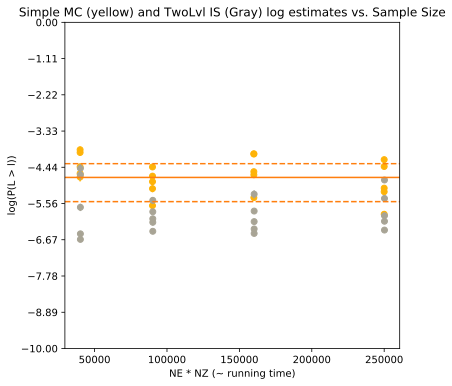

In [6]:
# plot the MC estimates
algos = ["2.1", "2.2", "glassermanli"]
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
colors = sns.xkcd_palette(colors)

fig, ax = plt.subplots(1, 1)

# offet to distinguish lines with same xval
offset = 200

plt.rcParams["figure.figsize"] = [6,6]

for key, group in df.groupby(["NE", "NZ", "algorithm"]):
    ne, nz, algo = key
    # compute x 
    if algo == "2.1":
        xval = ne*nz-offset
    elif algo == "2.2":
        xval = ne*nz
    else:
        xval = ne*nz+offset

    # xaxis by sample size
    xs = [xval for _ in range(len(group))]
    # yaxis are values of MC estimate
    ys = group["muHat"]
    # transformed to log scale
    if show_log_scale:
        ys = group["muHat"].apply(lambda x: math.log(x))
    # plot the MC estimate
    plt.plot(xs, ys, "o", color=colors[algos.index(algo)])
    
    # plot the CI for each MC estimate
    def extract_ci(row):
        lower, upper = row["muCI0"], row["muCI1"]
        if show_log_scale is True:
            lower, upper = math.log(lower), math.log(upper)
        return lower, upper
    cis = list(group.apply(extract_ci, axis=1))
    for ci in cis:
        l = mlines.Line2D([xval, xval], [ci[0], ci[1]], color=colors[algos.index(algo)])
        ax.add_line(l)
        
    # compute CI for MC estimate where N=NRuns
    if show_NRun_CI:
        result = stats.describe(ys)
        lower, upper = stats.norm.interval(0.95, loc=result.mean, scale=math.sqrt(result.variance))
        l = mlines.Line2D([xval, xval], [lower, upper], color="g")
        ax.add_line(l)

# horizontal line is 
# MC estimate and CI when running algorithm 2.2 on (NZ, NE) = (1000, 10000)
plt.axhline(y=bernoulli_overnight["muHat"], linestyle="-", color="C1")
plt.axhline(y=bernoulli_overnight["muCI0"], linestyle="--", color="C1")
plt.axhline(y=bernoulli_overnight["muCI1"], linestyle="--", color="C1")

plt.ylabel("P(L > l)")
plt.xlabel("NE * NZ (~ running time)")

if show_log_scale:
    plt.yticks(np.linspace(0, -10, 10))
    plt.ylabel("log(P(L > l))")
    
# plt.legend(["simple MC", "G&L TwoLvl IS"])
# plt.legend()
plt.title("Simple MC (yellow) and TwoLvl IS (Gray) log estimates vs. Sample Size")
plt.show()

In [ ]:
# plot the change in variance 
# should expect approx the same ... since they are said to be equivalent

fig, ax = plt.subplots(1, 1)

# offet to distinguish lines with same xval
offset = 200

for key, group in df.groupby(["NE", "NZ", "algorithm"]):
    ne, nz, algo = key
    # compute x 
    xval = ne*nz+offset if algo == "2.2" else ne*nz-offset
    # xaxis by sample size
    xs = [xval for _ in range(len(group))]
    # yaxis are values of MC estimate
    ys = group["sigmaHat"]
    # transformed to log scale
    if show_log_scale:
        ys = group["sigmaHat"].apply(lambda x: math.log(x))
    # plot the MC estimate
    plt.plot(xs, ys, ".", color=colors[algo])
    
    # plot the CI for each MC estimate
    def extract_ci(row):
        lower, upper = row["sigmaCI0"], row["sigmaCI1"]
        if show_log_scale is True:
            lower, upper = math.log(lower), math.log(upper)
        return lower, upper
    cis = list(group.apply(extract_ci, axis=1))
    for ci in cis:
        l = mlines.Line2D([xval, xval], [ci[0], ci[1]], color=colors[algo])
        ax.add_line(l)
    
    
plt.axhline(y=bernoulli_overnight["sigmaHat"], linestyle="-", color="C1")
plt.axhline(y=bernoulli_overnight["sigmaCI0"], linestyle="--", color="C1")
plt.axhline(y=bernoulli_overnight["sigmaCI1"], linestyle="--", color="C1")

plt.ylabel("Variance")
plt.xlabel("NE * NZ (~ running time)")

if show_log_scale:
    plt.yticks(np.linspace(0, -20, 10))
    plt.ylabel("log(Variance)")

plt.show()

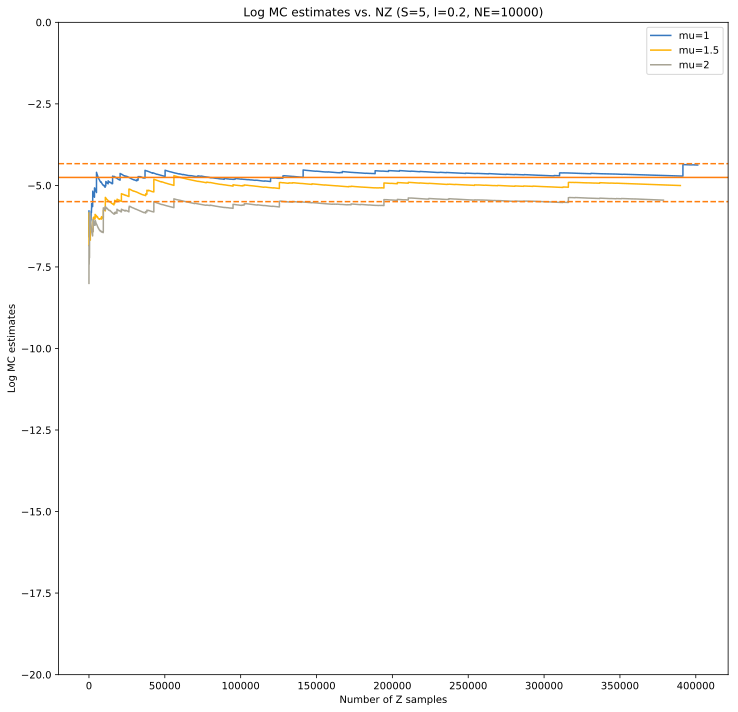

In [4]:
import seaborn as sns

gl_slow_path = os.path.join("..", "fullcredit", "RecreatingBinaryCreditProblem", "GlassermanIS_slow")
logpaths = ["allmu1s.txt", "allmu15s.txt", "allmu2s.txt"]
logpaths = map(lambda x: os.path.join(gl_slow_path, x), logpaths)

colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
colors = sns.xkcd_palette(colors)

def get_gl_slow(logpath):
    with open(logpath, "r") as f:
        def parse_line(line):
            mean, variance = line.split(':')
            return float(mean), float(variance)
        mv = map(parse_line, f.read().splitlines())
        mv_trans = zip(*mv)
        means, variances = mv_trans[0], mv_trans[1]
        means, variances = list(means), list(variances)
        
        if show_log_scale:
            means = np.log(means)
            variances = np.log(variances)
        return means, variances
    
mvs = map(get_gl_slow, logpaths)

plt.figure(figsize=(12,12))

for i, (means, variances) in enumerate(mvs):
    plt.plot(np.linspace(0, len(means)*10, len(means)), means, color=colors[i], label=str(i))

plt.axhline(y=bernoulli_overnight["muHat"], linestyle="-", color="C1")
plt.axhline(y=bernoulli_overnight["muCI0"], linestyle="--", color="C1")
plt.axhline(y=bernoulli_overnight["muCI1"], linestyle="--", color="C1")

plt.title("Log MC estimates vs. NZ (S=5, l=0.2, NE=10000)")
plt.ylabel("Log MC estimates")
plt.xlabel("Number of Z samples")
if show_log_scale:
    plt.ylim((-20, 0))
plt.legend(["mu=1", "mu=1.5", "mu=2"])
plt.show()